### Deliverable 1: Preprocessing the Data for a Neural Network

In [25]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [26]:
application_df.shape

(34299, 12)

In [27]:
for column in application_df.columns:
    print(column)
    print(application_df[column].nunique())
    print("*"*20)

EIN
34299
********************
NAME
19568
********************
APPLICATION_TYPE
17
********************
AFFILIATION
6
********************
CLASSIFICATION
71
********************
USE_CASE
5
********************
ORGANIZATION
4
********************
STATUS
2
********************
INCOME_AMT
9
********************
SPECIAL_CONSIDERATIONS
2
********************
ASK_AMT
8747
********************
IS_SUCCESSFUL
2
********************


In [28]:
column_list=['IS_SUCCESSFUL', 'STATUS', 'ORGANIZATION','USE_CASE']

for column in column_list:
    print(column)
    print(application_df[column].value_counts())
    print("*"*20)

IS_SUCCESSFUL
1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64
********************
STATUS
1    34294
0        5
Name: STATUS, dtype: int64
********************
ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64
********************
USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64
********************


In [29]:
application_df=application_df[application_df["STATUS"]!=0]

In [30]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=["EIN", "STATUS"])

In [31]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19565
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [32]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27032
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

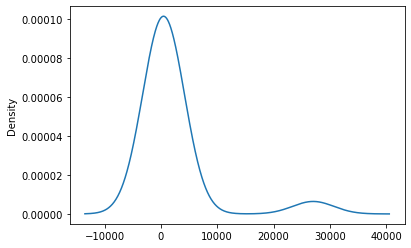

In [33]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [34]:
# Determine which values to replace if counts are less than ...?
replace_application=list(application_counts[application_counts<500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27032
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [35]:
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17323
C2000     6073
C1200     4837
C3000     1918
C2100     1882
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

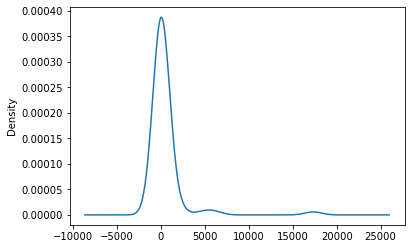

In [36]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [37]:
# Determine which values to replace if counts are less than ..?
replace_class=list (classification_counts[classification_counts<1000].index) 

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17323
C2000     6073
C1200     4837
Other     2261
C3000     1918
C2100     1882
Name: CLASSIFICATION, dtype: int64

In [38]:
# Generate our categorical variable lists
application_cat=application_df.dtypes[application_df.dtypes=="object"].index.tolist()

In [39]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df=pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

c:\Users\kceni\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,NAME_146TH ALUMNI ASSOCIATION,NAME_14TH ARMORED DIVISION,NAME_150TH INTELLIGENCE SQUADRON ENLISTED ADVISORY COUNCIL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
# Merge one-hot encoded features and drop the originals
application_df=application_df.merge(encode_df,left_index=True,right_index=True)
application_df=application_df.drop(application_cat,1)
application_df.head()

C:\Users\kceni\AppData\Local\Temp\ipykernel_24588\4024663997.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df=application_df.drop(application_cat,1)


,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,NAME_146TH ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
# Split our preprocessed data into our features and target arrays
y=application_df["IS_SUCCESSFUL"].values
X=application_df.drop(["IS_SUCCESSFUL"],1).values
# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=7)

C:\Users\kceni\AppData\Local\Temp\ipykernel_24588\1401448167.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=application_df.drop(["IS_SUCCESSFUL"],1).values


In [42]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
numberofinputfeatures=len(X_train[0])
nodes1=50
nodes2=25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes1, activation="relu", input_dim=numberofinputfeatures))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                980400    
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 981,701
Trainable params: 981,701
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [45]:
import os 
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("1modelweights/",exist_ok=True)
path="1modelweights/weight.{epoch:02d}.hdf5"
callback=ModelCheckpoint(filepath=path,save_weights_only=True,save_freq="epoch")

In [46]:
# Train the model
fit_model=nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[callback])

Epoch 1/100
804/804 [==============================] - 8s 8ms/step - loss: 0.6951 - accuracy: 0.5562
Epoch 2/100
804/804 [==============================] - 6s 7ms/step - loss: 0.3681 - accuracy: 0.8049
Epoch 3/100
804/804 [==============================] - 6s 8ms/step - loss: 0.2939 - accuracy: 0.8301
Epoch 4/100
804/804 [==============================] - 6s 8ms/step - loss: 0.2857 - accuracy: 0.8339
Epoch 5/100
804/804 [==============================] - 6s 8ms/step - loss: 0.2841 - accuracy: 0.8344
Epoch 6/100
804/804 [==============================] - 6s 8ms/step - loss: 0.2830 - accuracy: 0.8361
Epoch 7/100
804/804 [==============================] - 6s 8ms/step - loss: 0.2820 - accuracy: 0.8366
Epoch 8/100
804/804 [==============================] - 6s 8ms/step - loss: 0.2810 - accuracy: 0.8360
Epoch 9/100
804/804 [==============================] - 6s 8ms/step - loss: 0.2805 - accuracy: 0.8379
Epoch 10/100
804/804 [==============================] - 6s 8ms/step - loss: 0.2794 - accura

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 1.3631 - accuracy: 0.5481 - 1s/epoch - 4ms/step
Loss: 1.3630996942520142, Accuracy: 0.5481162071228027


In [48]:
nn.save("2AlphabetSoupCharity.h5")